In [ ]:
'''
This file is for Exploratory Data Analysis
@ Author: Shuyi Wang
@ Date: 2017/3/18
'''
import pandas as pd
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

%matplotlib inline

For this competition, you are tasked with categorizing shopping trip types based on the items that customers purchased. To give a few hypothetical examples of trip types: a customer may make a small daily dinner trip, a weekly large grocery trip, a trip to buy gifts for an upcoming holiday, or a seasonal trip to buy clothes. \newline
Each visit may only have one TripType. 


Data fields

TripType - a categorical id representing the type of shopping trip the customer made. This is the ground truth that you are predicting. TripType_999 is an "other" category.
VisitNumber - an id corresponding to a single trip by a single customer
Weekday - the weekday of the trip
Upc - the UPC number of the product purchased
ScanCount - the number of the given item that was purchased. A negative value indicates a product return.
DepartmentDescription - a high-level description of the item's department
FinelineNumber - a more refined category for each of the products, created by Walmart

In [2]:
path = 'C:\Users\shuyi\Documents\StudyResource\Kaggle\\'
train_file = "train.csv"

In [3]:
# Read the training data
train_data = pd.read_csv(path + train_file)

print("number of rows:", train_data.shape[0])
print("number of columns:", train_data.shape[1])
train_data[1:10]

('number of rows:', 647054)
('number of columns:', 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0
5,26,8,Friday,2.006619e+09,2,PAINT AND ACCESSORIES,1017.0
6,26,8,Friday,2.006614e+09,1,PAINT AND ACCESSORIES,1017.0
7,26,8,Friday,7.004803e+09,1,PAINT AND ACCESSORIES,2802.0
8,26,8,Friday,2.238495e+09,1,PAINT AND ACCESSORIES,4501.0
9,26,8,Friday,2.238400e+09,-1,PAINT AND ACCESSORIES,3565.0


In [4]:
# Inspect missing values in the dataset
if train_data.shape[0] - train_data.dropna().shape[0] == train_data.shape[0]:
    print("There is no missing value in the data set.")
else:
    print("Find the missing value and do data cleaning.")


Find the missing value and do data cleaning.


In [5]:
# Delete the rows with missing value
train_data = train_data.dropna(axis = 0)
print("After deleting the rows with missing value, the shape after filtering is:", train_data.shape)

('After deleting the rows with missing value, the shape after filtering is:', (642925, 7))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003C78E588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000042E44B70>]], dtype=object)

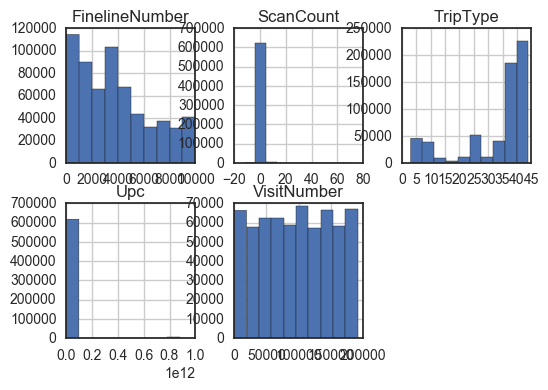

In [45]:
train_data1.hist(layout=(2,3))   

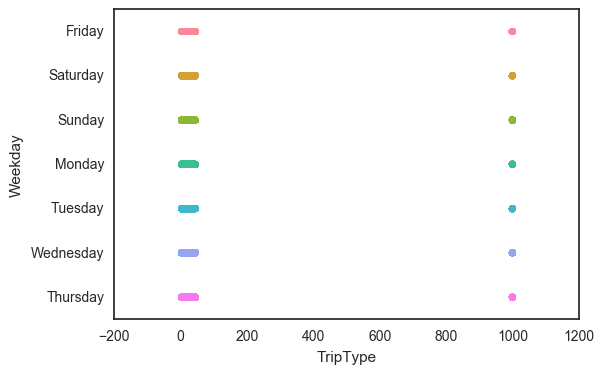

In [27]:
# Visualization of the Data
# visualizrion example reference: https://www.kaggle.com/benhamner/d/uciml/iris/python-data-visualizations
sns.stripplot(x="TripType", y="Weekday", data = train_data)

The Trip Type(TripType_999 is an "other" category) distributes in a similar way in different weekdays.

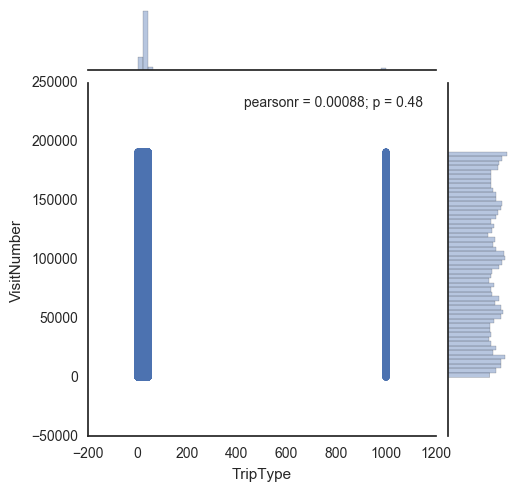

In [30]:
sns.jointplot(x="TripType", y="VisitNumber", data=train_data, size=5)

Most of the trip types concentrated at the regular range, a small portion of trip types = 999 exist. And the distribution of visitnumber to type 999 is similar.

Let put the type 999  aside and investigate the distribution of other types first.

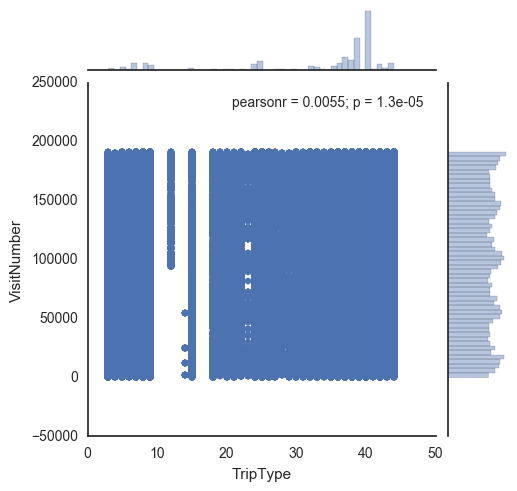

In [34]:
# filter the type999 in the dataset
train_data1 = train_data[train_data['TripType'] != 999]
sns.jointplot(x="TripType", y="VisitNumber", data=train_data1, size=5)

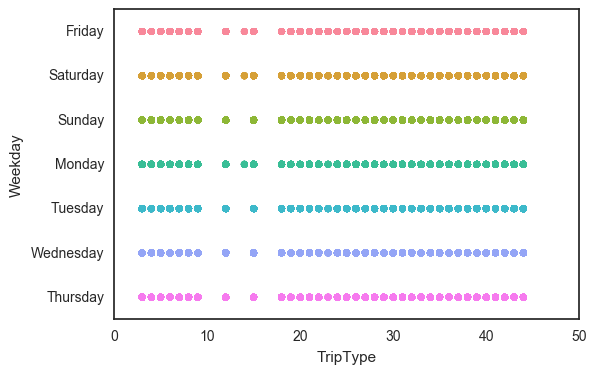

In [35]:
sns.stripplot(x="TripType", y="Weekday", data = train_data1)

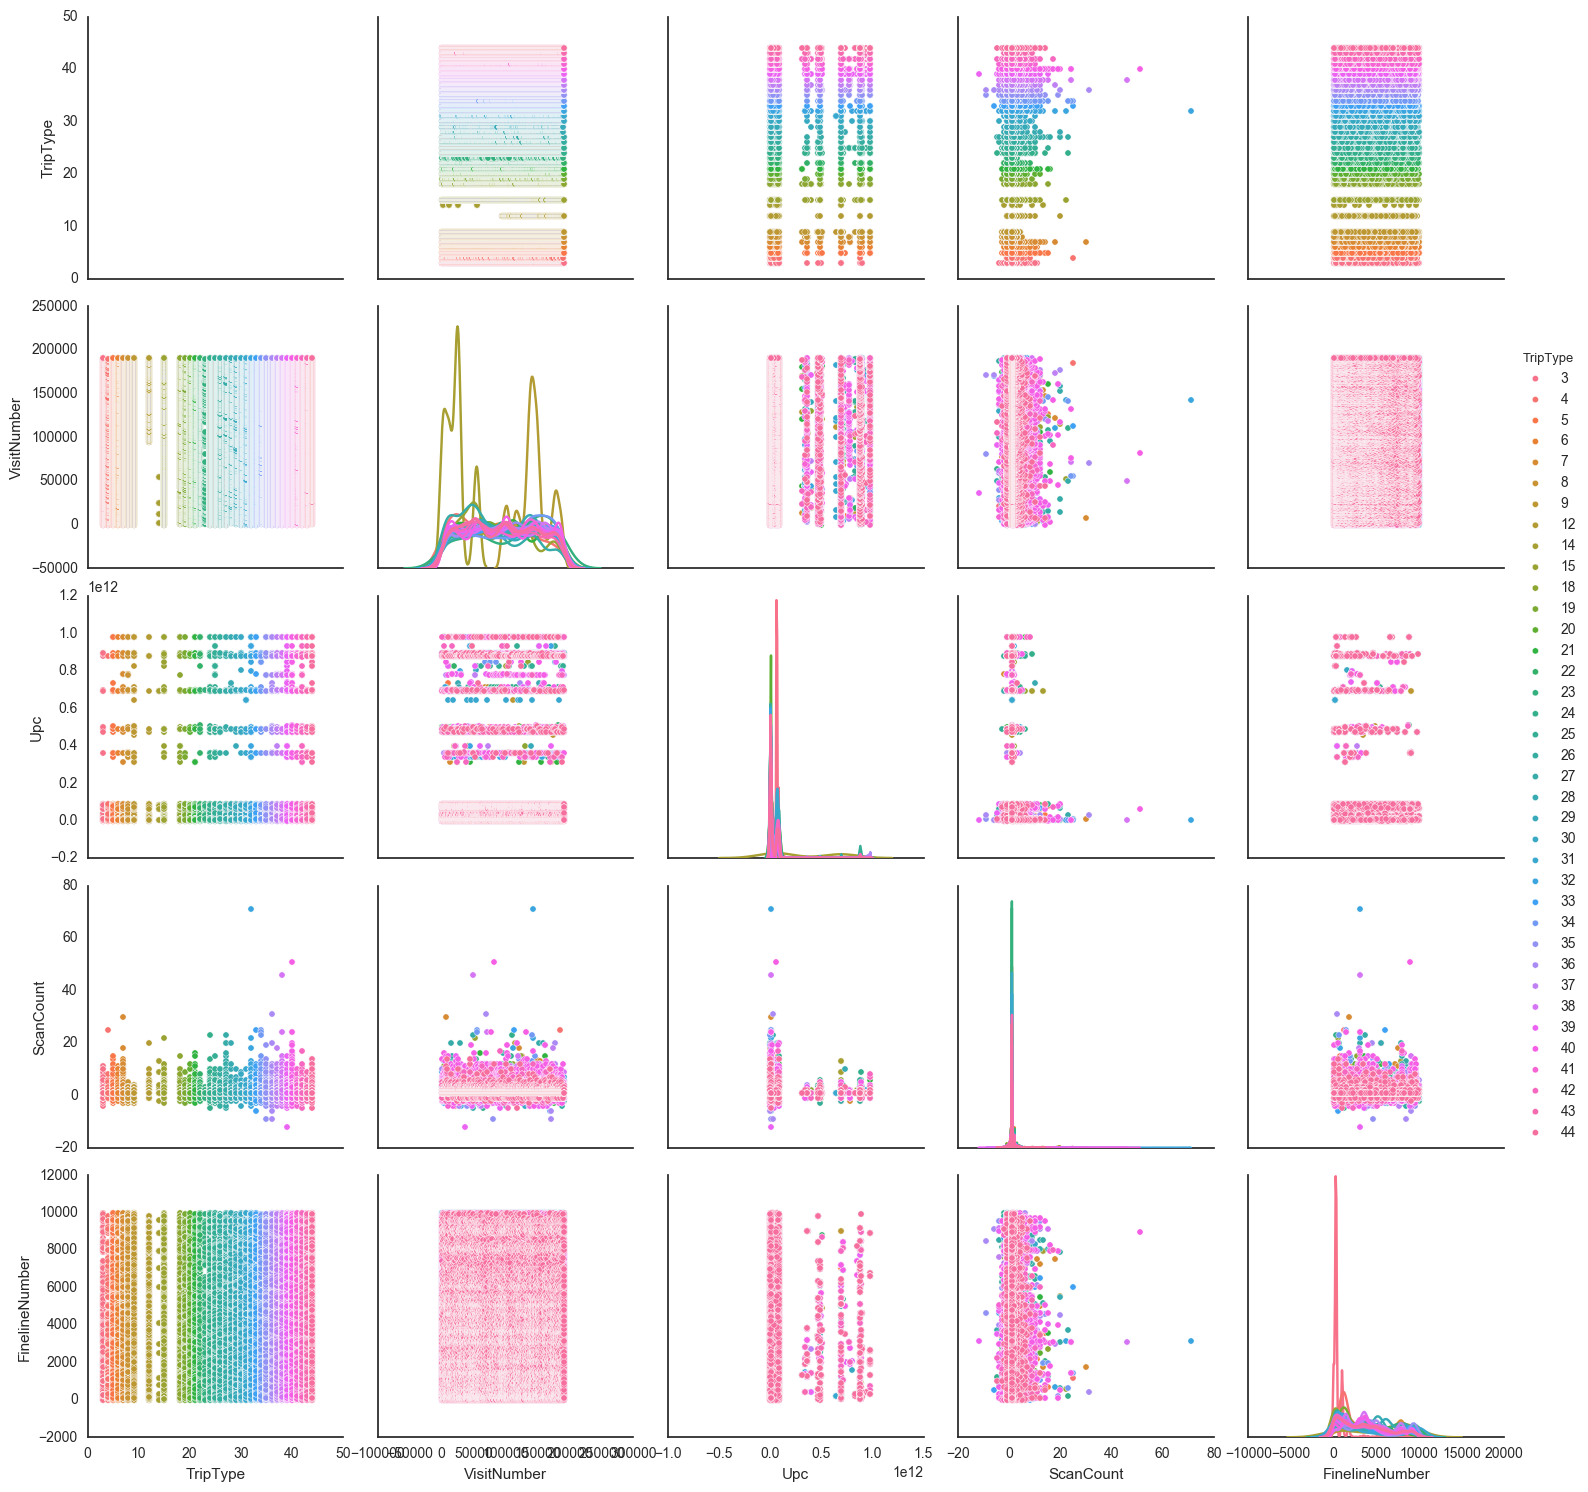

In [46]:
sns.pairplot(train_data1, hue="TripType", size=3, diag_kind="kde")

Stastistical Testing

1. Outliers: we can see from the plots above that there are some outliers exist in the san count variable, therefore, we did investigation into it to detect them.

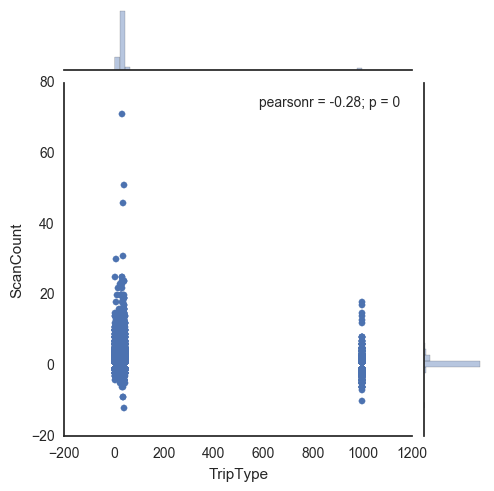

In [48]:
sns.jointplot(x="TripType", y="ScanCount", data=train_data, size=5)

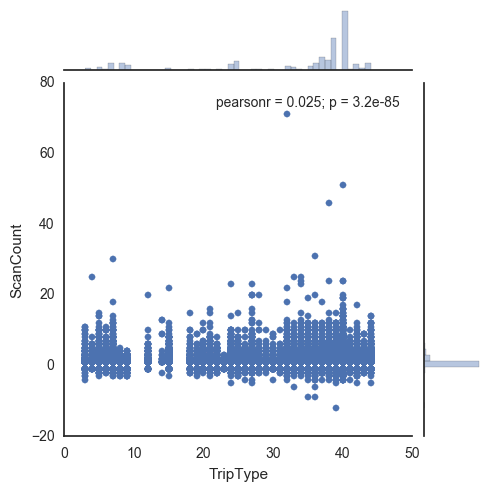

In [49]:
sns.jointplot(x="TripType", y="ScanCount", data=train_data1, size=5)

A point that falls outside the data set's inner fences is classified as a minor outlier, while one that falls outside the outer fences is classified as a major outlier. To find the inner fences for your data set, first, multiply the interquartile range by 1.5. Then, add the result to Q3 and subtract it from Q1.

In [98]:
# group rows by triptype
grouped_data = train_data.sort('TripType')

In [116]:
trip_type = train_data.TripType.unique()
filtered = pd.DataFrame(columns = train_data.columns)
for t in trip_type:
    temp = grouped_data.loc[grouped_data['TripType'] == t]
    p1 = temp['ScanCount'].quantile(0.25)
    p3 = temp['ScanCount'].quantile(0.75)
    minimum = p1 - 1.5*(p3 - p1)
    maximum = p3 + 1.5*(p3 - p1)
    
    filtered_temp = temp.loc[(temp['ScanCount'] >= minimum) & (temp['ScanCount'] <= maximum)]
    filtered = pd.concat([filtered, filtered_temp], axis = 0)
    
filtered = filtered.sort('TripType')
filtered

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
386289,3.0,113742.0,Tuesday,6.811318e+10,1.0,FINANCIAL SERVICES,283.0
599912,3.0,179058.0,Saturday,6.053881e+10,1.0,FINANCIAL SERVICES,278.0
589812,3.0,176229.0,Friday,6.811318e+10,1.0,FINANCIAL SERVICES,283.0
127133,3.0,37950.0,Thursday,6.053880e+10,1.0,IMPULSE MERCHANDISE,1001.0
423739,3.0,125999.0,Thursday,6.811311e+10,1.0,FINANCIAL SERVICES,200.0
423738,3.0,125999.0,Thursday,6.053889e+10,1.0,FINANCIAL SERVICES,285.0
75147,3.0,21400.0,Monday,6.811316e+10,1.0,FINANCIAL SERVICES,278.0
75148,3.0,21400.0,Monday,6.811316e+10,1.0,FINANCIAL SERVICES,277.0
511299,3.0,151436.0,Monday,6.811316e+10,1.0,FINANCIAL SERVICES,278.0
99020,3.0,28701.0,Tuesday,6.811319e+10,1.0,FINANCIAL SERVICES,0.0


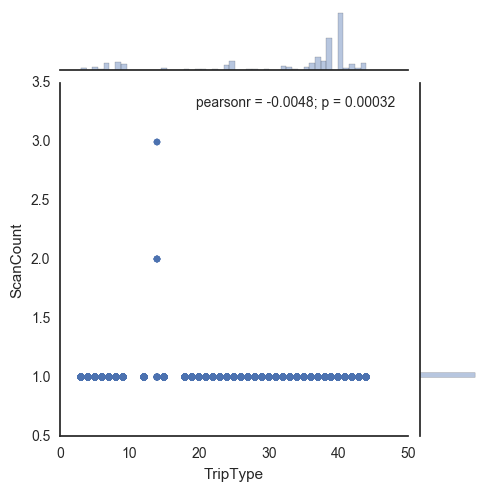

In [110]:
sns.jointplot(x="TripType", y="ScanCount", data = filtered[filtered['TripType'] < 999], size=5)

2. Cateogrical Variable: One-hot encoding

对于 Categorical Variable，常用的做法就是 One-hot encoding。即对这一变量创建一组新的伪变量，对应其所有可能的取值。这些变量中只有这条数据对应的取值为 1，其他都为 0。

In [6]:
# we still use train_data here( reserve filtering for later)
trip_type = train_data.TripType.unique()
print len(trip_type)
visit_num = train_data.VisitNumber.unique()
print(len(visit_num))
weekday = train_data.Weekday.unique()
print len(weekday)
upc = train_data.Upc.unique()
print len(upc)
department = train_data.DepartmentDescription.unique()
print len(department)

38
94247
7
97714
68


对 weekday 和 department 进行 encoding

In [12]:
weekday = pd.get_dummies(train_data['Weekday'])
department = pd.get_dummies(train_data['DepartmentDescription'])

In [ ]:
train_data.drop(['Weekday'], axis = 1, inplace = "True")
train_data.drop(['DepartmentDescription'], axis = 1, inplace = "True")
train_data = train_data.join(weekday)
train_data = train_data.join(department)

In [17]:
# save the data for the next step
train_data.to_csv(path + "step1.csv")